### Ejercicio 1
Coge un conjunto de datos de tema deportivo que te guste y selecciona un atributo del conjunto de datos. 

In [4]:
import pandas as pd
import statistics
from statistics import mean, median, mode, stdev

import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr

import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()

In [5]:
#Cargar los datos
filename = 'C:/Users/Lucía Alvarez/OneDrive - psico.edu.uy/00 Barcelona activa/athlete_events.csv'
df = pd.read_csv(filename, sep=",", encoding="utf8") 
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


Calcula la moda, mediana, desviación estándar y media aritmética. 

In [6]:
#Se crea una nueva variable de Edad eliminando los valores perdidos
Age_new = [x for x in df.Age if np.isnan(x) == False]

print("La moda de la variable Edad es", "{:.2f}".format(mode(Age_new)), 
      "la mediana es", "{:.2f}".format(median(Age_new)),
     "su desviación estándar es", "{:.2f}".format(stdev(Age_new)), 
      "y su media aritmética es", "{:.2f}".format(mean(Age_new)))

La moda de la variable Edad es 23.00 la mediana es 24.00 su desviación estándar es 6.39 y su media aritmética es 25.56


### Ejercicio 2
Continuando con los datos de tema deportivo, selecciona dos atributos y calcula su correlación. 

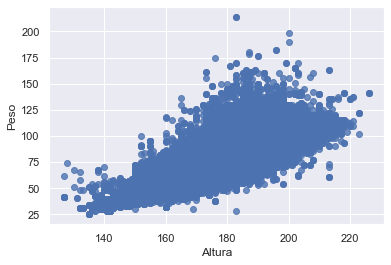

In [7]:
# Gráfico de dispersión
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=df.Height, y=df.Weight, alpha= 0.8)
ax.set_xlabel('Altura')
ax.set_ylabel('Peso');


Se  realiza un gráfico de dispersión previo a la estimación del coeficiente de correlación.

El gráfico de dispersión se realiza para explorar la relación entre las variables de interés y para evaluar si el dataframe presenta outliers.

En el diagrama obtenido se podría asumir una relación lineal positiva entre las dos variables evaluadas.

Se podría hipotetizar que las variables presentan algunos outliers. Por ejemplo, el punto ubicado en las coordenadas x=1802 e y=205. Este valor podría ser un outiler por cómo están distribuidos los datos. 

Otro valor que podría ser considerado un outlier es el ubicado en las coordenadas x=183 e y=25. En este valor podríamos considerar que es muy improbable que una persona mida 183 y pese 25.

Estos dos ejemplos son datos de participantes que podríamos considerar como outliers y se podría pensar en su próxima exclusión de los análisis posteriores.

In [8]:
#Caclcular el coeficiente de correlación de Spearman y su p valor
r, p = stats.spearmanr(df['Height'], df['Weight'], nan_policy='omit')

r= "{:.2f}".format(r)
p= "{:.4f}".format(p)


print(f"La correlación de Spearman es: r={r}, con un p-value de: {p}")


La correlación de Spearman es: r=0.83, con un p-value de: 0.0000


La correlación de Spearman entre Peso y Altura es de .83. La asociación entre las variables es positiva. Esto indica que las variables varian en la misma dirección. Es decir, el peso aumenta y la altura aumenta en la misma dirección. A su vez, se observa que la asociación es significativa (debido a que su p valor es < .001) esto quiere decir que el resultado no es producto del azar, y que la asociación es diferente a cero.

### Ejercicio 3
Continuando con los datos de tema deportivo, calcula la correlación de todos los atributos entre sí y represéntalos en una matriz con distintos colores de intensidad.

In [9]:
#Para realizar el análisis es necesario quedarse únicamente con las variables númericas
df2 = df.drop(columns =['ID', 'Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City'
                       , 'Sport', 'Event','Medal', 'Year',])
df2

,Age,Height,Weight
0,24.0,180.0,80.0
1,23.0,170.0,60.0
2,24.0,NaN,NaN
3,34.0,NaN,NaN
4,21.0,185.0,82.0
...,...,...,...
271111,29.0,179.0,89.0
271112,27.0,176.0,59.0
271113,27.0,176.0,59.0
271114,30.0,185.0,96.0


In [10]:
corr_df = df2.corr()
print("Las correlaciones de las variables son:")
print(corr_df, "\n")

Las correlaciones de las variables son:
             Age    Height    Weight
Age     1.000000  0.138246  0.212069
Height  0.138246  1.000000  0.796213
Weight  0.212069  0.796213  1.000000 



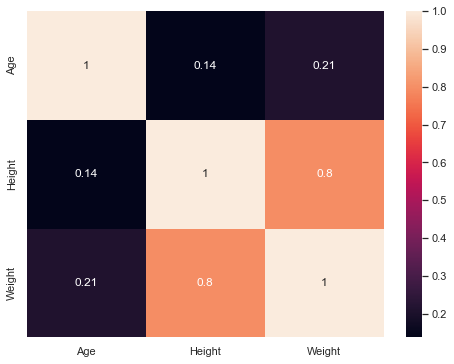

In [11]:
corr_df = df2.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

En la matriz de colores se observa que la correlación perfecta (valor de 1) está marcada con el color más claro, mientras que las correlaciones más débiles están marcadas con el color azul fuerte, tal cual lo señala la referencia al lado de la matriz.
Todas las correlaciones son positivas. Las correlaciones más fuertes son las de altura con peso.
Es importante considerar que la correlación perfecta se obtiene asociando una variable consigo misma. Por ejemplo, si se evalúa la asociación entre Edad con Edad.


### Ejercicio 4
Siguiendo con los datos de tema deportivo, selecciona un atributo y calcula la media geométrica y la media armónica.

In [12]:
Media_geometrica= statistics.geometric_mean(Age_new)
print("La media geométrica de la variable edad es", round(Media_geometrica,2))

Media_armonica= statistics.harmonic_mean(Age_new)
print("La media armónica de la variable edad es", round(Media_armonica,2))

La media geométrica de la variable edad es 24.87
La media armónica de la variable edad es 24.26


Enlaces relacionados a este sprint:

https://www.delftstack.com/es/howto/python-pandas/pandas-correlation-matrix/

https://docs.python.org/3/library/statistics.html

https://www.delftstack.com/es/howto/python/remove-nan-from-list-python/
